In [3]:
#welcome to the signature presentation of Data Science signature presentation by Nathaly and Sai.


#Let us use Images for data and use machinelearning models and python for processing images and deriving conclusions



# We shall deal with the machine learning project focussed on Rice leaves diseases
# lets upgrade pip and install packages we need for this project
import imutils


In [5]:
pip install opencv-python

     -------------------------------------- 38.1/38.1 MB 909.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from imutils import paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
from skimage.io import imread, imshow
import os
import cv2
# since we are getting warnings in every step, lets avoid that with next line code
import warnings
warnings.filterwarnings("ignore")

In [5]:
def extract_features(imagepaths):
    count = 1
    temp = []
    for img in imagepaths:
        print("Extracting features of image", count, "...")
        count += 1
        image = imread(img)
        # Create a new array for array matrix
        feature_matrix = np.zeros((image.shape[0], image.shape[1]), dtype=np.float64)
        # Compute feature_matrix
        for i in range(0, image.shape[0]):
            for j in range(0, image.shape[1]):
                feature_matrix[i][j] = ((float(image[i, j, 0]) + float(image[i, j, 1]) + float(image[i, j, 2])) / 3)
        features = np.reshape(feature_matrix, (image.shape[0] * image.shape[1]))
        temp.append(features)
    print("Extracted the features of", count-1, "images")
    return temp

In [6]:
#Function for extracting features to DF and spliting into 500 features
def extractedfeatures_df(temp, label):
    data = []
    for i in temp:
        sublist = np.array_split(i, 500)
        row = []
        for j in sublist:
            row.append(mean(j))
        row.append(label)
        data.append(row)
    return data

In [10]:
#This step takes long time to execute be patient 
#Calling functions for extracting features
# Here there are 5 types of diseases
# Bacterial leaf blight, Brown_spot, leaf_blast, leaf_scald, narrow_brown_spot, and some healthy images

# Bacterial leaf blight
imagepaths_bacterial_leaf_blight = list(paths.list_images(r"C:\Users\saiys\OneDrive\Desktop\train\bacterial_leaf_blight"))
data_bacterial_leaf_blight = extractedfeatures_df(extract_features(imagepaths_bacterial_leaf_blight), 0)

# Brown spot
imagepaths_brown_spot = list(paths.list_images(r"C:\Users\saiys\OneDrive\Desktop\train\brown_spot"))
data_brown_spot = extractedfeatures_df(extract_features(imagepaths_brown_spot), 1)

# Leaf blast
imagepaths_leaf_blast = list(paths.list_images(r"C:\Users\saiys\OneDrive\Desktop\train\leaf_blast"))
data_leaf_blast = extractedfeatures_df(extract_features(imagepaths_leaf_blast), 2)

# Leaf scald
imagepaths_leaf_scald = list(paths.list_images(r"C:\Users\saiys\OneDrive\Desktop\train\leaf_scald"))
data_leaf_scald = extractedfeatures_df(extract_features(imagepaths_leaf_scald), 3)

# Narrow brown spot
imagepaths_narrow_brown_spot = list(paths.list_images(r"C:\Users\saiys\OneDrive\Desktop\train\narrow_brown_spot"))
data_narrow_brown_spot = extractedfeatures_df(extract_features(imagepaths_narrow_brown_spot), 4)

# Healthy
imagepaths_healthy_leaf = list(paths.list_images(r"C:\Users\saiys\OneDrive\Desktop\train\healthy"))
data_healthy_leaf = extractedfeatures_df(extract_features(imagepaths_healthy_leaf), 5)



Extracting features of image 1 ...
Extracting features of image 2 ...
Extracting features of image 3 ...
Extracting features of image 4 ...
Extracting features of image 5 ...
Extracting features of image 6 ...
Extracting features of image 7 ...
Extracting features of image 8 ...
Extracting features of image 9 ...
Extracting features of image 10 ...
Extracting features of image 11 ...
Extracting features of image 12 ...
Extracting features of image 13 ...
Extracting features of image 14 ...
Extracting features of image 15 ...
Extracting features of image 16 ...
Extracting features of image 17 ...
Extracting features of image 18 ...
Extracting features of image 19 ...
Extracting features of image 20 ...
Extracting features of image 21 ...
Extracting features of image 22 ...
Extracting features of image 23 ...
Extracting features of image 24 ...
Extracting features of image 25 ...
Extracting features of image 26 ...
Extracting features of image 27 ...
Extracting features of image 28 ...
E

In [12]:
data_combined = data_bacterial_leaf_blight + data_brown_spot + data_leaf_blast + data_healthy_leaf + data_narrow_brown_spot + data_leaf_scald
df = pd.DataFrame(data_combined)


In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,177.345960,150.388889,168.118687,158.934343,159.530303,167.318182,150.373737,175.914141,141.500000,184.505051,...,106.681934,186.374046,113.671756,178.928753,120.854962,171.867684,128.516539,164.323155,136.422392,0
1,195.881313,203.949495,187.997475,211.919192,181.684343,218.229798,181.323232,218.487374,181.840909,217.916667,...,204.229008,217.356234,203.786260,217.770992,203.592875,218.132316,202.760814,218.496183,200.394402,0
2,125.742424,195.156566,117.073232,203.838384,108.626263,212.553030,104.297980,216.401515,99.618687,220.356061,...,134.165394,164.651399,140.997455,158.267176,147.302799,151.806616,153.847328,144.356234,161.061069,0
3,133.835859,216.618687,125.952020,224.724747,123.643939,226.790404,123.815657,224.830808,125.694444,219.914141,...,200.374046,168.417303,206.628499,162.715013,212.320611,157.737913,217.025445,156.793893,218.030534,0
4,210.863636,223.308081,211.545455,223.747475,211.656566,223.891414,211.606061,223.964646,211.732323,223.994949,...,173.936387,176.450382,180.203562,169.676845,186.320611,163.424936,191.908397,157.371501,197.491094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,251.702020,254.876263,251.555556,254.959596,251.343434,255.000000,251.053030,255.000000,250.752525,255.000000,...,215.096692,255.000000,215.147583,254.994911,215.027990,254.946565,215.460560,249.498728,220.277354,3
2096,254.060606,255.000000,253.767677,255.000000,253.568182,255.000000,253.727273,255.000000,253.868687,255.000000,...,196.541985,255.000000,195.969466,254.992366,195.804071,254.139949,196.083969,246.356234,203.254453,3
2097,253.232323,255.000000,253.000000,255.000000,253.065657,255.000000,253.227273,255.000000,253.169192,255.000000,...,208.440204,255.000000,208.272265,254.992366,207.969466,254.231552,208.582697,246.167939,216.832061,3
2098,254.361111,251.611111,250.982323,254.941919,250.843434,255.000000,250.803030,255.000000,250.732323,255.000000,...,235.608142,255.000000,235.819338,255.000000,236.025445,255.000000,236.346056,255.000000,236.674300,3


In [14]:
#df.to_csv('rice_leaf_diseases/rice_classification.csv')

In [15]:
df1 = df.drop(500, axis=1)

In [16]:
df1

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,177.345960,150.388889,168.118687,158.934343,159.530303,167.318182,150.373737,175.914141,141.500000,184.505051,...,193.305344,106.681934,186.374046,113.671756,178.928753,120.854962,171.867684,128.516539,164.323155,136.422392
1,195.881313,203.949495,187.997475,211.919192,181.684343,218.229798,181.323232,218.487374,181.840909,217.916667,...,216.994911,204.229008,217.356234,203.786260,217.770992,203.592875,218.132316,202.760814,218.496183,200.394402
2,125.742424,195.156566,117.073232,203.838384,108.626263,212.553030,104.297980,216.401515,99.618687,220.356061,...,171.407125,134.165394,164.651399,140.997455,158.267176,147.302799,151.806616,153.847328,144.356234,161.061069
3,133.835859,216.618687,125.952020,224.724747,123.643939,226.790404,123.815657,224.830808,125.694444,219.914141,...,174.638677,200.374046,168.417303,206.628499,162.715013,212.320611,157.737913,217.025445,156.793893,218.030534
4,210.863636,223.308081,211.545455,223.747475,211.656566,223.891414,211.606061,223.964646,211.732323,223.994949,...,182.966921,173.936387,176.450382,180.203562,169.676845,186.320611,163.424936,191.908397,157.371501,197.491094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,251.702020,254.876263,251.555556,254.959596,251.343434,255.000000,251.053030,255.000000,250.752525,255.000000,...,255.000000,215.096692,255.000000,215.147583,254.994911,215.027990,254.946565,215.460560,249.498728,220.277354
2096,254.060606,255.000000,253.767677,255.000000,253.568182,255.000000,253.727273,255.000000,253.868687,255.000000,...,255.000000,196.541985,255.000000,195.969466,254.992366,195.804071,254.139949,196.083969,246.356234,203.254453
2097,253.232323,255.000000,253.000000,255.000000,253.065657,255.000000,253.227273,255.000000,253.169192,255.000000,...,255.000000,208.440204,255.000000,208.272265,254.992366,207.969466,254.231552,208.582697,246.167939,216.832061
2098,254.361111,251.611111,250.982323,254.941919,250.843434,255.000000,250.803030,255.000000,250.732323,255.000000,...,255.000000,235.608142,255.000000,235.819338,255.000000,236.025445,255.000000,236.346056,255.000000,236.674300


In [17]:
df2 = df.iloc[:,[500]]

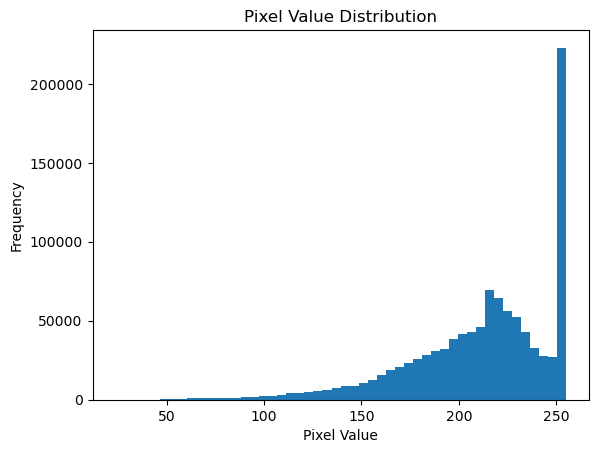

In [18]:
#Histogram of pixel values:
import matplotlib.pyplot as plt

# plot histogram of pixel values
plt.hist(df1.values.flatten(), bins=50)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

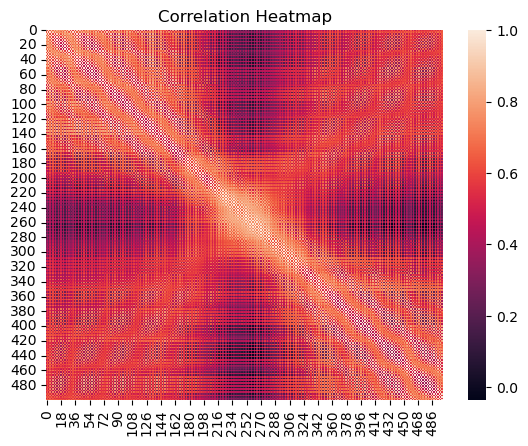

In [19]:
#Heatmap of correlations:
import seaborn as sns

# plot heatmap of correlations
corr = df1.corr()
sns.heatmap(corr)
plt.title("Correlation Heatmap")
plt.show()

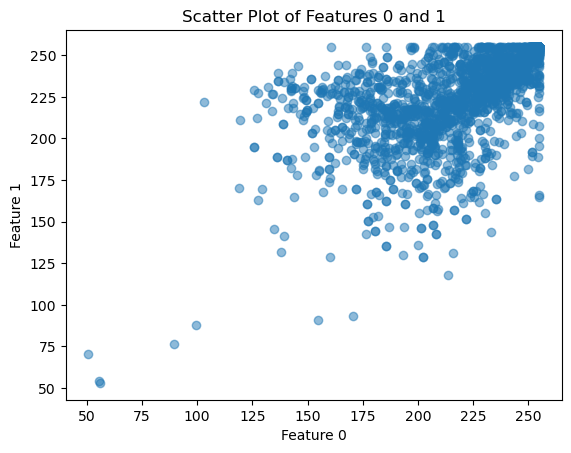

In [20]:
#Scatter plot of two features:
# plot scatter plot of two features
plt.scatter(df[0], df[1], alpha=0.5)
plt.title("Scatter Plot of Features 0 and 1")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [21]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(499, axis=1), df.iloc[:,[500]], test_size=0.2, random_state=42)

# create a logistic regression classifier
clf = LogisticRegression()

# fit the classifier to the training data
clf.fit(X_train, y_train)

# predict the labels of the test data
y_pred_log = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy_log = clf.score(X_test, y_test)
accuracy_train = clf.score(X_train, y_train)

print("Predicted labels:", y_pred_log)
print("Accuracy using logistic regression:", accuracy_log)

Predicted labels: [3 4 3 5 1 3 1 4 2 4 4 5 4 3 3 1 4 3 4 4 4 5 5 4 4 3 5 4 1 1 4 4 5 2 4 5 5
 5 2 0 5 4 4 2 5 1 4 5 1 5 2 4 3 4 4 5 3 4 3 4 3 2 4 5 3 5 2 3 4 0 4 2 2 5
 0 4 4 2 3 4 0 0 2 5 4 0 4 4 0 4 1 3 0 2 4 5 3 5 4 2 4 0 0 2 1 0 2 0 4 3 4
 5 4 0 4 2 4 4 4 4 1 2 4 2 0 5 3 3 3 4 4 4 4 1 1 2 2 0 3 2 3 3 4 2 5 4 2 4
 3 4 4 3 1 5 0 3 3 4 5 4 0 4 5 1 4 4 2 4 5 5 2 1 3 0 4 4 4 1 4 2 0 2 2 0 3
 4 3 5 2 0 2 3 2 4 4 5 4 3 3 3 3 3 2 5 3 2 1 5 3 4 4 0 3 4 4 2 2 2 0 3 2 3
 0 3 5 5 0 4 4 0 2 5 1 0 2 4 5 5 2 3 2 4 4 0 1 3 1 1 2 5 2 3 4 0 4 3 1 2 0
 3 3 0 1 5 5 4 1 4 5 1 4 3 4 2 4 4 4 0 5 1 1 3 1 0 2 4 3 3 2 4 1 2 5 4 5 3
 4 3 4 0 1 2 4 5 3 1 2 2 1 0 2 4 3 4 0 4 3 1 3 2 2 5 0 2 4 1 3 2 5 5 2 3 5
 1 3 5 1 4 5 5 5 5 1 0 1 3 1 3 2 3 1 5 3 3 1 5 0 5 2 4 1 4 0 3 4 5 4 3 2 4
 0 2 4 5 4 2 5 4 5 2 3 4 3 2 0 4 0 3 3 2 3 5 4 4 0 4 2 1 4 0 5 2 3 1 5 1 4
 0 2 1 5 1 4 5 3 4 2 1 0 4]
Accuracy using logistic regression: 0.5285714285714286


In [22]:
#performance metrics for logistic regression
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate precision for each class when using logistic regression
precision = precision_score(y_test, y_pred_log, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_log, average='macro')
print("Overall precision for logistic regression:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_log, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_log, average='macro')
print("Overall recall for logistic regression:", overall_recall)

print(70*"-")

# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_log, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_log, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_log)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_log))
print("RMS =",rms)


Precision for each class: [0.53191489 0.58333333 0.4057971  0.70666667 0.4        0.63636364]
Overall precision for logistic regression: 0.5440126052383222
----------------------------------------------------------------------
Recall score for each class: [0.34722222 0.35       0.46666667 0.8030303  0.64788732 0.5915493 ]
Overall recall for logistic regression: 0.5343926352729169
----------------------------------------------------------------------
F1 score for each class: [0.42016807 0.4375     0.43410853 0.75177305 0.49462366 0.61313869]
----------------------------------------------------------------------
Confusion matrix:
 [[25  4  6 11 26  0]
 [ 4 28 18  0 21  9]
 [ 3  7 28  4  8 10]
 [ 1  0  1 53  9  2]
 [13  1  2  6 46  3]
 [ 1  8 14  1  5 42]]
----------------------------------------------------------------------
RMS = 1.9469145308606104


In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(499, axis=1), df.iloc[:,[500]], test_size=0.2, random_state=42)

# create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# predict the labels of the test data
y_pred_knn = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy_knn = clf.score(X_test, y_test)
accuracy_train = clf.score(X_train, y_train)

print("Predicted labels:", y_pred_knn)
print("Accuracy using KNN:", accuracy_knn)

Predicted labels: [2 5 0 5 1 3 2 1 4 1 4 5 4 3 3 5 4 4 0 1 4 5 5 0 4 3 2 4 1 1 0 4 5 2 0 2 1
 5 2 0 5 0 0 2 2 1 1 2 1 1 2 4 3 4 4 5 0 4 3 3 3 2 4 2 3 5 1 3 4 0 0 2 2 1
 0 4 0 1 3 1 0 0 2 5 4 4 4 4 0 4 1 0 0 1 0 5 3 5 0 0 0 0 5 1 1 0 1 4 4 3 1
 5 4 4 0 0 4 0 4 4 1 5 4 0 4 1 3 3 3 4 3 4 2 0 2 2 0 0 3 2 0 3 4 5 2 0 2 4
 3 4 0 0 1 2 0 0 3 4 4 4 1 1 2 2 4 1 1 4 5 5 5 1 3 1 4 4 4 1 4 5 0 2 0 4 3
 0 3 2 2 0 0 4 0 4 4 5 1 4 3 3 3 3 1 5 2 0 2 5 3 0 2 0 3 1 4 2 1 2 0 3 1 3
 0 0 2 3 4 4 4 0 2 5 2 4 2 0 1 1 2 3 5 4 4 0 5 3 2 0 5 5 1 3 2 4 4 3 1 1 1
 5 3 0 1 5 5 3 1 0 5 1 4 3 4 2 4 0 3 1 2 1 2 3 1 4 2 4 3 3 2 1 2 5 2 3 5 0
 2 3 0 0 4 5 0 2 4 2 1 2 1 4 5 4 0 4 0 0 0 1 3 2 1 5 3 2 0 0 3 1 5 5 2 3 5
 1 3 5 1 0 5 1 5 1 0 4 5 3 2 4 2 3 1 2 3 3 1 5 0 4 2 4 2 4 0 3 0 5 0 3 1 1
 4 0 0 4 4 2 5 0 5 5 3 0 3 1 0 4 0 3 3 5 3 5 4 4 4 0 2 1 0 0 1 0 3 1 5 1 4
 4 2 5 5 1 0 2 3 0 3 0 0 4]
Accuracy using KNN: 0.7309523809523809


In [24]:
#performance metrics for KNN
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate precision for each class
precision = precision_score(y_test, y_pred_knn, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_knn, average='macro')
print("Overall precision for KNN:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_knn, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_knn, average='macro')
print("Overall recall for KNN:", overall_recall)

print(70*"-")

# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_log, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_log, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_knn))
print("RMS =",rms)

Precision for each class: [0.80232558 0.67647059 0.53225806 0.90769231 0.68674699 0.76785714]
Overall precision for KNN: 0.7288917787746717
----------------------------------------------------------------------
Recall score for each class: [0.95833333 0.575      0.55       0.89393939 0.8028169  0.6056338 ]
Overall recall for KNN: 0.7309539052496797
----------------------------------------------------------------------
F1 score for each class: [0.42016807 0.4375     0.43410853 0.75177305 0.49462366 0.61313869]
----------------------------------------------------------------------
Confusion matrix:
 [[69  1  0  1  1  0]
 [ 5 46  9  0 14  6]
 [ 8  5 33  2  5  7]
 [ 0  1  0 59  6  0]
 [ 0  8  3  3 57  0]
 [ 4  7 17  0  0 43]]
----------------------------------------------------------------------
RMS = 1.4192553379451192


In [25]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(499, axis=1), df.iloc[:,[500]], test_size=0.2, random_state=42)

# create an SVM classifier
clf = SVC()

# fit the classifier to the training data
clf.fit(X_train, y_train)

# predict the labels of the test data
y_pred_svc = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Predicted labels:", y_pred_svc)
print("Accuracy using SVM:", accuracy_svc)

Predicted labels: [2 1 0 5 1 3 2 0 4 4 4 5 4 3 3 5 4 4 0 4 4 5 5 0 4 3 2 4 5 1 0 4 5 2 0 5 5
 5 2 0 5 0 0 3 5 1 4 5 1 5 2 4 3 4 4 5 0 4 3 3 3 2 4 2 3 5 2 3 4 0 0 2 2 5
 0 4 0 2 3 4 0 0 2 5 4 4 4 4 0 4 5 0 0 2 0 5 3 5 0 0 0 0 1 1 1 0 2 4 4 3 4
 5 4 4 5 0 4 0 4 4 5 2 4 0 4 1 3 3 3 4 3 4 4 0 5 2 0 0 3 2 0 3 4 2 2 0 2 4
 3 4 0 0 1 4 0 0 3 4 2 4 4 4 5 5 4 4 1 4 5 2 5 1 3 4 4 4 4 1 4 2 0 2 0 4 3
 0 3 5 2 0 0 4 0 4 4 5 4 4 3 3 3 3 2 5 0 0 2 5 3 0 2 0 3 4 4 2 2 2 0 3 1 3
 0 0 2 3 4 4 4 0 2 5 5 4 2 0 5 5 2 3 5 4 4 0 5 3 2 0 5 5 2 3 2 4 4 3 1 1 4
 5 3 0 1 5 5 4 1 0 5 0 4 3 4 2 4 0 3 4 5 5 2 4 1 1 2 4 3 3 2 1 2 2 2 4 5 0
 4 3 0 0 4 5 0 5 3 5 1 2 1 4 2 4 0 4 0 0 0 1 3 2 1 5 4 2 0 0 3 1 5 5 2 3 5
 1 3 5 1 0 5 1 5 5 0 4 5 3 5 4 2 3 1 2 3 4 2 5 0 4 2 4 1 4 0 3 0 5 0 3 2 4
 4 0 0 4 4 2 5 0 5 5 3 0 3 2 0 4 0 3 3 2 3 5 4 4 4 0 2 5 0 0 2 0 3 5 5 1 4
 4 2 5 5 1 0 5 3 0 3 0 0 4]
Accuracy using SVM: 0.7238095238095238


In [26]:
#performance metrics for Support Vector Classifier (SVC)

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix




# Calculate precision for each class
precision = precision_score(y_test, y_pred_svc, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_svc, average='macro')
print("Overall precision for SVC:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_svc, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_log, average='macro')
print("Overall recall for SVC:", overall_recall)

print(70*"-")

# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_svc, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_log, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_svc))
print(rms)


Precision for each class: [0.78409091 0.81818182 0.5483871  0.91935484 0.65686275 0.68493151]
Overall precision for SVC: 0.735301485783992
----------------------------------------------------------------------
Recall score for each class: [0.95833333 0.3375     0.56666667 0.86363636 0.94366197 0.70422535]
Overall recall for SVC: 0.5343926352729169
----------------------------------------------------------------------
F1 score for each class: [0.8625     0.47787611 0.55737705 0.890625   0.77456647 0.69444444]
----------------------------------------------------------------------
Confusion matrix:
 [[69  0  0  1  2  0]
 [ 6 27 13  0 19 15]
 [ 9  1 34  3  6  7]
 [ 0  1  0 57  8  0]
 [ 0  0  2  1 67  1]
 [ 4  4 13  0  0 50]]
----------------------------------------------------------------------
1.46466313370621


In [27]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1,df2, test_size=0.2, random_state=42)


# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_DT = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_DT = clf.score(X_test, y_test)

print("Predicted labels:", y_pred_DT)
print("Accuracy using Decision Tree:", accuracy_DT)

Predicted labels: [2 2 0 5 1 3 2 1 4 1 4 5 1 3 3 5 4 2 0 3 4 1 1 0 4 3 5 4 1 1 0 4 5 2 0 2 5
 5 2 0 5 0 0 2 5 1 1 5 1 5 1 4 3 2 4 5 0 2 3 3 3 2 4 5 3 1 2 3 2 0 0 2 5 1
 2 4 0 2 3 3 0 5 5 5 4 4 4 4 0 4 1 0 0 2 5 5 3 5 0 0 2 0 1 1 1 1 2 4 4 3 1
 5 4 4 5 5 4 0 1 4 1 5 4 0 4 2 3 3 3 4 3 4 3 0 2 2 2 0 3 1 2 3 4 2 1 2 5 3
 0 4 0 2 1 4 0 1 3 3 4 1 0 4 5 2 4 1 1 4 1 1 1 1 3 1 4 4 4 1 1 2 0 2 2 4 3
 0 3 2 2 0 0 4 2 1 1 5 3 4 3 3 3 3 1 5 5 0 1 5 3 0 2 0 4 4 4 5 4 2 0 3 1 3
 0 0 1 0 4 4 1 0 2 5 5 4 1 5 5 2 1 3 5 2 4 2 2 3 2 0 5 5 2 3 5 2 4 3 1 5 1
 5 3 0 1 5 5 4 1 0 5 1 1 3 4 1 4 0 3 1 5 5 1 4 1 2 2 4 3 3 2 1 2 5 1 2 5 0
 4 3 0 0 0 2 5 2 4 2 0 2 1 4 1 4 0 4 0 0 0 1 3 2 5 5 4 5 0 5 3 1 5 1 2 3 5
 1 3 5 1 0 5 1 5 5 0 4 5 3 2 4 1 3 1 1 3 4 1 1 0 2 2 2 1 0 0 3 0 5 0 3 2 4
 4 0 0 0 4 2 5 0 5 5 3 0 4 1 0 4 0 3 3 5 3 5 1 1 3 0 2 5 1 0 2 0 3 1 5 1 2
 1 0 0 2 1 0 5 3 0 3 0 0 4]
Accuracy using Decision Tree: 0.7357142857142858


In [28]:
#Performance metrics for decision tree

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate precision for each class
precision = precision_score(y_test, y_pred_DT, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_DT, average='macro')
print("Overall precision for Decision Tree:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_DT, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_DT, average='macro')
print("Overall recall for Decision Tree:", overall_recall)

print(70*"-")

# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_DT, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_DT, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_DT)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_DT))
print("RMS =",rms)

Precision for each class: [0.84210526 0.65822785 0.49230769 0.88888889 0.80882353 0.72463768]
Overall precision for Decision Tree: 0.7358318171711544
----------------------------------------------------------------------
Recall score for each class: [0.88888889 0.65       0.53333333 0.84848485 0.77464789 0.70422535]
Overall recall for Decision Tree: 0.7332633850239484
----------------------------------------------------------------------
F1 score for each class: [0.86486486 0.65408805 0.512      0.86821705 0.79136691 0.71428571]
----------------------------------------------------------------------
Confusion matrix:
 [[64  2  3  1  1  1]
 [ 3 52 12  0  5  8]
 [ 4 11 32  1  2 10]
 [ 3  1  1 56  5  0]
 [ 1  7  3  5 55  0]
 [ 1  6 14  0  0 50]]
----------------------------------------------------------------------
RMS = 1.3434142714598147


In [29]:
#Ensemble methods
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1,df2, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_RF = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_RF = clf.score(X_test, y_test)

print("Predicted labels:", y_pred_RF)
print("Accuracy using Random Forest:", accuracy_RF)

Predicted labels: [2 5 0 5 1 3 2 1 4 4 4 5 1 3 3 5 4 4 0 4 4 5 1 0 4 3 2 4 5 1 0 4 5 5 0 2 5
 5 2 0 5 0 0 2 5 1 1 5 1 5 1 4 3 4 4 5 0 2 3 3 3 2 4 5 3 1 2 3 4 0 0 2 2 1
 0 4 0 2 3 4 0 0 5 5 4 4 4 4 0 4 1 0 0 2 5 5 3 5 0 0 1 0 5 1 1 0 2 4 4 3 1
 5 4 4 5 5 4 0 4 4 1 5 4 0 4 1 3 3 3 4 3 4 2 0 5 2 2 0 3 2 0 3 4 1 5 0 5 4
 3 4 0 0 1 4 0 0 3 4 4 4 0 4 5 2 4 1 1 4 5 2 5 1 3 1 4 4 4 1 4 5 0 2 0 4 3
 0 3 5 2 0 0 4 2 1 4 1 4 4 3 3 3 3 1 5 5 0 2 5 3 0 2 0 3 4 4 2 2 2 0 3 1 3
 0 0 1 3 4 4 1 0 2 5 5 4 2 5 5 5 2 3 5 4 4 2 1 3 2 0 5 5 2 3 5 2 4 3 1 5 4
 5 3 0 1 5 2 4 1 0 5 5 4 3 4 2 4 0 3 1 5 5 2 4 2 1 2 4 3 3 2 1 2 5 2 2 5 0
 4 3 0 0 2 5 0 2 3 5 1 2 1 4 2 4 0 4 0 0 0 1 3 2 1 5 4 5 0 5 3 1 5 1 2 3 5
 1 3 5 1 0 5 1 5 5 0 4 5 3 5 4 2 3 1 2 3 3 1 5 0 2 2 2 1 4 0 3 0 5 0 3 1 4
 4 0 0 4 4 2 5 0 5 5 3 0 3 1 0 4 0 3 3 5 3 5 1 4 4 0 2 1 1 0 2 0 3 1 5 1 4
 4 2 5 5 1 0 5 3 0 3 0 0 4]
Accuracy using Random Forest: 0.819047619047619


In [30]:
#performance metrics for Random Forest
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate precision for each class
precision = precision_score(y_test, y_pred_RF, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_RF, average='macro')
print("Overall precision for Random Forest:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_RF, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_RF, average='macro')
print("Overall recall for Random Forest:", overall_recall)

print(70*"-")

# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_RF, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_RF, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_RF)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_RF))
print("RMS =",rms)

Precision for each class: [0.90909091 0.89655172 0.6440678  0.93548387 0.78823529 0.74683544]
Overall precision for Random Forest: 0.8200441729937289
----------------------------------------------------------------------
Recall score for each class: [0.97222222 0.65       0.63333333 0.87878788 0.94366197 0.83098592]
Overall recall for Random Forest: 0.8181652202778964
----------------------------------------------------------------------
F1 score for each class: [0.93959732 0.75362319 0.63865546 0.90625    0.85897436 0.78666667]
----------------------------------------------------------------------
Confusion matrix:
 [[70  0  0  1  1  0]
 [ 1 52  9  0 10  8]
 [ 5  4 38  2  0 11]
 [ 0  1  0 58  7  0]
 [ 0  0  2  1 67  1]
 [ 1  1 10  0  0 59]]
----------------------------------------------------------------------
RMS = 1.123345344008138


In [31]:
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1,df2, test_size=0.2, random_state=42)

# Create a Decision Tree classifier as the base estimator
base_estimator = DecisionTreeClassifier()

# Create an AdaBoost classifier
clf = AdaBoostClassifier(base_estimator=base_estimator)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_ADB = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_ADB = clf.score(X_test, y_test)

print("Predicted labels:", y_pred_ADB)
print("Accuracy using ADA Boost:", accuracy_ADB)

Predicted labels: [2 2 0 5 1 3 2 1 4 1 4 5 1 3 3 5 4 2 0 3 4 1 1 1 4 3 1 4 1 1 0 4 5 2 0 2 5
 5 2 0 5 0 0 2 5 1 1 5 1 5 1 4 3 3 4 5 0 2 3 3 3 2 4 2 3 1 2 3 2 0 0 2 2 1
 0 4 0 2 3 3 0 0 5 5 4 4 4 4 0 4 1 0 0 2 5 5 3 5 0 0 1 0 1 1 1 1 2 4 4 3 1
 5 4 4 5 5 4 0 1 4 1 5 4 0 4 5 3 3 4 4 3 4 3 0 1 2 2 0 3 1 2 3 4 2 1 2 5 3
 4 4 0 2 1 2 0 1 3 3 4 4 0 4 5 2 4 1 1 4 1 1 1 1 3 1 4 4 4 1 4 5 0 2 2 4 3
 0 3 2 0 0 0 4 2 1 1 5 1 4 3 3 3 3 1 5 5 0 1 5 3 0 2 0 2 4 4 5 4 2 0 3 1 3
 0 0 1 3 4 4 1 0 2 5 5 4 1 5 5 2 1 3 5 2 4 2 1 3 2 0 5 5 2 3 5 2 4 3 1 5 1
 5 1 0 1 5 5 4 1 0 5 1 1 3 4 2 4 0 3 1 5 5 1 4 1 2 2 4 3 3 5 1 2 2 1 2 5 0
 4 3 0 0 4 5 5 5 3 1 1 2 1 4 1 1 0 4 0 0 0 1 3 2 5 5 4 5 0 5 3 1 5 1 2 3 5
 1 3 5 1 0 5 1 5 1 0 4 5 3 2 4 1 3 1 1 3 4 1 5 0 2 2 2 1 2 0 3 0 5 0 3 2 4
 4 0 0 4 4 2 5 0 5 5 3 0 4 1 0 4 0 3 3 5 3 5 1 1 2 0 2 5 1 0 2 0 3 1 2 1 2
 1 2 0 2 1 0 5 3 0 3 0 0 4]
Accuracy using ADA Boost: 0.7523809523809524


In [32]:
#Performance indicators for ADA BOOST

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate precision for each class
precision = precision_score(y_test, y_pred_ADB, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_ADB, average='macro')
print("Overall precision for ADA Boost:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_ADB, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_ADB, average='macro')
print("Overall recall for ADA Boost:", overall_recall)

print(70*"-")

# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_ADB, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_ADB, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_ADB)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_ADB))
print("RMS =",rms)

Precision for each class: [0.92957746 0.63953488 0.53968254 0.90322581 0.8        0.72058824]
Overall precision for ADA Boost: 0.7554348216563221
----------------------------------------------------------------------
Recall score for each class: [0.91666667 0.6875     0.56666667 0.84848485 0.78873239 0.69014085]
Overall recall for ADA Boost: 0.7496985702091337
----------------------------------------------------------------------
F1 score for each class: [0.92307692 0.6626506  0.55284553 0.875      0.79432624 0.70503597]
----------------------------------------------------------------------
Confusion matrix:
 [[66  3  2  0  1  0]
 [ 1 55 11  0  5  8]
 [ 3 10 34  2  0 11]
 [ 0  1  1 56  8  0]
 [ 0  7  4  4 56  0]
 [ 1 10 11  0  0 49]]
----------------------------------------------------------------------
RMS = 1.3047532151257388


In [33]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1,df2, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_GB = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_GB = clf.score(X_test, y_test)

print("Predicted labels:", y_pred_GB)
print("Accuracy using Gradient Boost:", accuracy_GB)

Predicted labels: [2 1 0 5 1 3 2 1 4 4 4 5 1 3 3 5 4 4 0 4 4 1 1 0 1 3 2 4 1 1 0 4 5 2 0 2 5
 5 2 0 5 0 0 2 5 1 1 5 1 5 1 4 3 4 4 5 0 2 3 3 3 2 4 5 3 1 2 3 4 0 0 2 2 1
 0 4 0 1 3 3 0 0 5 5 4 4 4 4 0 4 1 0 0 1 5 5 3 5 0 0 0 0 5 1 1 2 1 3 4 3 1
 5 4 4 5 2 4 0 4 4 1 5 4 0 4 1 3 3 3 4 3 4 4 0 5 2 2 0 3 2 0 3 4 1 5 0 2 4
 1 4 0 0 1 2 0 0 3 4 4 4 0 4 5 5 4 1 1 4 5 2 5 1 3 1 4 4 4 1 4 2 0 2 2 4 3
 0 3 5 2 0 0 4 2 1 4 5 4 4 3 3 3 3 1 5 5 0 2 5 3 0 5 0 4 4 4 2 4 2 0 3 1 3
 0 0 2 3 4 4 4 0 2 5 5 4 2 0 5 5 2 3 5 4 4 0 1 3 1 0 5 5 2 3 5 1 4 3 1 5 4
 5 3 0 1 5 5 3 1 0 5 1 4 3 4 2 4 0 3 1 5 1 2 4 1 3 2 4 3 3 2 1 2 5 2 2 5 0
 4 3 0 0 2 5 5 2 1 5 1 2 1 4 2 4 0 4 0 0 0 1 3 2 1 5 4 5 0 5 3 1 5 1 2 3 5
 1 3 5 1 0 5 1 5 5 0 4 5 3 1 4 2 3 1 2 3 3 1 5 0 4 5 2 1 4 0 4 0 5 0 3 1 4
 4 0 0 4 4 2 5 0 5 5 3 0 3 1 0 4 0 3 3 5 3 5 1 4 4 0 2 5 1 0 2 0 3 5 5 2 4
 4 2 5 5 1 0 5 3 0 3 0 0 4]
Accuracy using Gradient Boost: 0.7952380952380952


In [34]:
#performance metrics for Gradient boost
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate precision for each class
precision = precision_score(y_test, y_pred_GB, average=None)
print("Precision for each class:", precision)

# Calculate overall precision
overall_precision = precision_score(y_test, y_pred_GB, average='macro')
print("Overall precision for Gradient Boost:", overall_precision)

print(70*"-")

# Calculate recall score for each class
recall = recall_score(y_test, y_pred_GB, average=None)
print("Recall score for each class:", recall)

# Calculate overall recall
overall_recall = recall_score(y_test, y_pred_GB, average='macro')
print("Overall recall for Gradient Boost:", overall_recall)

print(70*"-")
# Calculate F1 score for each class
f1_score = f1_score(y_test, y_pred_GB, average=None)
print("F1 score for each class:", f1_score)

# Calculate overall F1 score
# overall_f1_score = f1_score(y_test, y_pred_ADB, average='macro')
# print("Overall F1 score:", overall_f1_score)

print(70*"-")

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_GB)
print("Confusion matrix:\n", confusion_mat)

print(70*"-")

rms = sqrt(mean_squared_error(y_test, y_pred_GB))
print("RMS =", rms)

Precision for each class: [0.8961039  0.81538462 0.59259259 0.93548387 0.75581395 0.75      ]
Overall precision for Gradient Boost: 0.7908964880895363
----------------------------------------------------------------------
Recall score for each class: [0.95833333 0.6625     0.53333333 0.87878788 0.91549296 0.8028169 ]
Overall recall for Gradient Boost: 0.791877400768246
----------------------------------------------------------------------
F1 score for each class: [0.9261745  0.73103448 0.56140351 0.90625    0.82802548 0.7755102 ]
----------------------------------------------------------------------
Confusion matrix:
 [[69  0  1  1  1  0]
 [ 2 53  8  1 10  6]
 [ 6  7 32  0  3 12]
 [ 0  1  0 58  7  0]
 [ 0  1  2  2 65  1]
 [ 0  3 11  0  0 57]]
----------------------------------------------------------------------
RMS = 1.1526367287968176


In [35]:
#Comparision for all four methods
print("Accuracy using logistic regression:", accuracy_log)
print("Accuracy using SVC:", accuracy_svc)
print("Accuracy using KNN:", accuracy_knn)
print("Accuracy using Decision Tree:", accuracy_DT)
print("Accuracy using Random Forest:", accuracy_RF)
print("Accuracy using ADA Boost:", accuracy_ADB)
print("Accuracy using Gradient Boost:", accuracy_GB)

Accuracy using logistic regression: 0.5285714285714286
Accuracy using SVC: 0.7238095238095238
Accuracy using KNN: 0.7309523809523809
Accuracy using Decision Tree: 0.7357142857142858
Accuracy using Random Forest: 0.819047619047619
Accuracy using ADA Boost: 0.7523809523809524
Accuracy using Gradient Boost: 0.7952380952380952


In [1]:
#END of signature Presentation ;)